# Project 1
date: __23. August 2020 -__

name: __Jørn Eirik Betten__

subject: __FYS3150__

# Project tasks and introduction 
### Introduction
The aim of this project is to get familiar with various vector and matrix operations, from dynamic memory allocation to the usage of programs in the library package of the course. For Fortran users memory handling and most matrix and vector operations are included in the ANSI standard of Fortran 90/95. Array handling in Python is also rather trivial. For C++ user however, there are several possible options. Two are listed here.

- For this exercise we recommend that you make your own functions for dynamic memory allocation of a vector and a matrix. You don't need to write a class for this operations. Use then the library package lib.cpp with its header file lib.hpp for obtaining LU-decomposed matrices, solve linear equations etc.

- A very good and often recommended library for C++ handling of arrays is the library Armadillo, to be found at \url{arma.sourceforge.net}. We will discuss the usage of this library during the lab sessions and lectures. Armadillo has also an interface to Lapack functions for solving systems of linear equations.

Your program, whether it is written in C++, Python, Fortran or other languages, should include dynamic memory handling of matrices and vectors.

The material needed for this project is covered by chapter 6 of the lecture notes, in particular section 6.4 and subsequent sections.

Many important differential equations in Science can be written as linear second-order differential equations

$$
\frac{d^2y}{dx^2}+k^2(x)y = f(x),
$$
where $f$ is normally called the inhomogeneous term and $k^2$ is a real function.

A classical equation from electromagnetism is Poisson's equation. The electrostatic potential $\Phi$ is generated by a localized charge distribution $\rho (\mathbf{r})$. In three dimensions it reads

$$
\nabla^2 \Phi = -4\pi \rho (\mathbf{r}).
$$
With a spherically symmetric $\Phi$ and $\rho (\mathbf{r})$ the equations simplifies to a one-dimensional equation in $r$, namely

$$
\frac{1}{r^2}\frac{d}{dr}\left(r^2\frac{d\Phi}{dr}\right) = -4\pi \rho(r),
$$
which can be rewritten via a substitution $\Phi(r)= \phi(r)/r$ as

$$
\frac{d^2\phi}{dr^2}= -4\pi r\rho(r).
$$
The inhomogeneous term $f$ or source term is given by the charge distribution $\rho$ multiplied by $r$ and the constant $-4\pi$.

We will rewrite this equation by letting $\phi\rightarrow u$ and $r\rightarrow x$. The general one-dimensional Poisson equation reads then


$$
-u''(x) = f(x).
$$

### Project 1 a):
In this project we will solve the one-dimensional Poisson equation with Dirichlet boundary conditions by rewriting it as a set of linear equations.

To be more explicit we will solve the equation

$$
-u''(x) = f(x), \hspace{0.5cm} x\in(0,1), \hspace{0.5cm} u(0) = u(1) = 0.
$$
and we define the discretized approximation to $u$ as $v_i$ with grid points $x_i=ih$ in the interval from $x_0=0$ to $x_{n+1}=1$. The step length or spacing is defined as $h=1/(n+1)$. We have then the boundary conditions $v_0 = v_{n+1} = 0$. We approximate the second derivative of $u$ with

$$
-\frac{v_{i+1}+v_{i-1}-2v_i}{h^2} = f_i  \hspace{0.5cm} \mathrm{for} \hspace{0.1cm} i=1,\dots, n,
$$
where $f_i=f(x_i)$. Show that you can rewrite this equation as a linear set of equations of the form

$$
\mathbf{A}\mathbf{v} = \tilde{\mathbf{b}},
$$
where $\mathbf{A}$ is an $n\times n$ tridiagonal matrix which we rewrite as

$$
\mathbf{A} = \begin{bmatrix}
                           2&  -1 &  0& \dots   & \dots & 0 \\
                           -1 & 2 &  -1 & 0 & \dots & \dots \\
                           0 & -1 & 2 &  -1 &  0 &  \dots \\
                           \dots &  0 & \dots & \dots   & \dots & 0 \\
                           0 & \dots   & 0  & -1 & 2 & -1 \\
                           0 & \dots & \dots  & 0  & -1 &  2 \\
                      \end{bmatrix},
$$
and $\tilde{b}_i=h^2f_i$.

In our case we will assume that the source term is $f(x) = 100e^{-10x}$, and keep the same interval and boundary conditions. Then the above differential equation has a closed-form solution given by $u(x) = 1-(1-e^{-10})x-e^{-10x}$ (convince yourself that this is correct by inserting the solution in the Poisson equation). We will compare our numerical solution with this result in the next exercise.

### Project 1 b):
We can rewrite our matrix $\mathbf{A}$ in terms of one-dimensional vectors $a,b,c$
of length $1:n$. Our linear equation reads

$$
\mathbf{A} = \begin{bmatrix}
                           b_1 & c_1 & 0 & \dots & \dots & \dots \\
                           a_1 & b_2 & c_2 & \dots & \dots & \dots \\
                           0 & a_2 & b_3 & c_3 & \dots & \dots \\
                           \dots & \dots & \dots & \dots &\dots & \dots \\
                           \dots & \dots & \dots &a_{n-2}  & b_{n-1}& c_{n-1} \\
                           0 &  \dots & \dots  & \dots  & a_{n-1} & b_n \\
                      \end{bmatrix}\begin{bmatrix}
                           v_1\\
                           v_2\\
                           \dots \\
                          \dots  \\
                          \dots \\
                           v_n\\
                      \end{bmatrix}
  =\begin{bmatrix}
                           \tilde{b}_1\\
                           \tilde{b}_2\\
                           \dots \\
                           \dots \\
                          \dots \\
                           \tilde{b}_n\\
                      \end{bmatrix}.
$$
Note well that we do not include the endpoints since the boundary conditions are used resulting in a fixed value for $v_i$. A tridiagonal matrix is a special form of banded matrix where all the elements are zero except for those on and immediately above and below the leading diagonal. Develop a general algorithm first which does not assume that we have a matrix with the same elements along the diagonal and the non-diagonal elements. The algorithm for solving this set of equations is rather simple and requires two steps only, a decomposition and forward substitution and finally a backward substitution.

Before we proceed with the solution of the differential equation, you should now plan the organization of your data flow. Here you will find it convenient to define vectors that will contain the matrix elements, the solution to the problem and the function $f(x)$ when discretized. You should also plan on to read input data, whether you do this from the command line or from a selected file. We recommend strongly that you use dynamical memory allocation. An example of a C++ program which reads from the command line various input parameters can be found here

Your first task is to set up the general algorithm (assuming different values for the matrix elements) for solving this set of linear equations. Find also the precise number of floating point operations needed to solve the above equations. For the general algorithm you need to specify the values of the array elements $a$, $b$ and $c$ by inserting their explicit values.

Then you should code the above algorithm and solve the problem for matrices of the size $10\times 10$, $100\times 100$ and $1000\times 1000$. That means that you select $n=10$, $n=100$ and $n=1000$ grid points.

Compare your results (make plots) with the closed-form solution for the different number of grid points in the interval $x\in(0,1)$. The different number of grid points corresponds to different step lengths $h$.

### Project 1 c):
Use thereafter the fact that the matrix has identical matrix elements along the diagonal and identical (but different) values for the non-diagonal elements. Specialize your algorithm to the special case and find the number of floating point operations for this specific tri-diagonal matrix. Compare the CPU time with the general algorithm from the previous point for matrices up to $n=10^6$ grid points.

### Project 1 d):
Compute the relative error in the data set $i=1,\dots, n$,by setting up

$$
\epsilon_i=log_{10}\left(\left|\frac{v_i-u_i}
                 {u_i}\right|\right),
$$
as function of $log_{10}(h)$ for the function values $u_i$ and $v_i$. For each step length extract the max value of the relative error.
Try to increase $n$ to $n=10^7$. Make a table of the results and comment your results. You can use either the algorithm from b) or c).

### Project 1 e):
Compare your results with those from the LU decomposition codes for the matrix of sizes $10\times 10$, $100\times 100$ and $1000\times 1000$. Here you should use the library functions provided on the webpage of the course. Alternatively, if you use armadillo as a library, you can use the similar function for LU decomposition. The armadillo function for the LU decomposition is called $LU$ while the function for solving linear sets of equations is called $solve$. Use for example the unix function time when you run your codes and compare the time usage between LU decomposition and your tridiagonal solver. Alternatively, you can use the functions in C++, Fortran or Python that measure the time used.

Make a table of the results and comment the differences in execution time How many floating point operations does the LU decomposition use to solve the set of linear equations? Can you run the standard LU decomposition for a matrix of the size $10^5\times 10^5$? Comment your results.

To compute the elapsed time in c++ you can use the following statements

    ...
    #include "time.h"   //  you have to include the time.h header
    int main()
    {
        // declarations of variables 
        ...
        clock_t start, finish;  //  declare start and final time
        start = clock();
        // your code is here, do something and then get final time
        finish = clock();
        ( (finish - start)/CLOCKS_PER_SEC );
    ...
Similarly, in Fortran, this simple example shows how to compute the elapsed time.

    PROGRAM time
     REAL :: etime          ! Declare the type of etime()
     REAL :: elapsed(2)     ! For receiving user and system time
     REAL :: total          ! For receiving total time
     INTEGER :: i, j

     WRITE(*,*) 'Start'

     DO i = 1, 5000000  
          j = j + 1
     ENDDO

     total = ETIME(elapsed)
     WRITE(*,*) 'End: total=', total, ' user=', elapsed(1), &
                  ' system=', elapsed(2)

    END PROGRAM time
### Introduction to numerical projects
Here follows a brief recipe and recommendation on how to write a report for each project.

Give a short description of the nature of the problem and the eventual numerical methods you have used.

Describe the algorithm you have used and/or developed. Here you may find it convenient to use pseudocoding. In many cases you can describe the algorithm in the program itself.

Include the source code of your program. Comment your program properly.

If possible, try to find analytic solutions, or known limits in order to test your program when developing the code.

Include your results either in figure form or in a table. Remember to label your results. All tables and figures should have relevant captions and labels on the axes.

Try to evaluate the reliabilty and numerical stability/precision of your results. If possible, include a qualitative and/or quantitative discussion of the numerical stability, eventual loss of precision etc.

Try to give an interpretation of you results in your answers to the problems.

Critique: if possible include your comments and reflections about the exercise, whether you felt you learnt something, ideas for improvements and other thoughts you've made when solving the exercise. We wish to keep this course at the interactive level and your comments can help us improve it.

Try to establish a practice where you log your work at the computerlab. You may find such a logbook very handy at later stages in your work, especially when you don't properly remember what a previous test version of your program did. Here you could also record the time spent on solving the exercise, various algorithms you may have tested or other topics which you feel worthy of mentioning.

Format for electronic delivery of report and programs
The preferred format for the report is a PDF file. You can also use DOC or postscript formats or as an ipython notebook file. As programming language we prefer that you choose between C/C++, Fortran2008 or Python. The following prescription should be followed when preparing the report:

Use Devilry to hand in your projects, log in at http://devilry.ifi.uio.no with your normal UiO username and password and choose either 'fys3150' or 'fys4150'. There you can load up the files within the deadline.

Upload only the report file! For the source code file(s) you have developed please provide us with your link to your github domain. The report file should include all of your discussions and a list of the codes you have developed. Do not include library files which are available at the course homepage, unless you have made specific changes to them.

In your git repository, please include a folder which contains selected results. These can be in the form of output from your code for a selected set of runs and input parameters.

In this and all later projects, you should include tests (for example unit tests) of your code(s).

Comments from us on your projects, approval or not, corrections to be made etc can be found under your Devilry domain and are only visible to you and the teachers of the course.

Finally, we encourage you to work two and two together. Optimal working groups consist of 2-3 students. You can then hand in a common report.

# Project 1 a) 
We were given the expression for the approximated second-derivative of u:
$$
-\frac{v_{i+1}+v_{i-1}-2v_i}{h^2} = f_i  \hspace{0.5cm} \mathrm{for} \hspace{0.1cm} i=1,\dots, n,
$$
We can therefore approximate the second-derivative in n-1 points (from i = 1 to i = n). The last two points i=0 and i = n+1 are the boundary points ($v_0=0$, and $v_{n+1}=0$  ). This corresponds to n-1 equations of the form as shown above, with i = 1, 2, 3, ..., n -1, n. $ f_i $ is known for all. This corresponds to multiplying the v-vector with a (n+1)x(n+1) matrix A that has 2 all along its diagonal (corresponding to i-th element in the v-vector), and the neighboring points (corresponding to i-1-th and i+1-ith elements in the v-vector) will be -1. The rest of the matrix A will be 0, since none of the other terms of the v-vector is in the equation. 

$$
\mathbf{A} = \begin{bmatrix}
                           2&  -1& 0& \dots& \dots& 0 \\
                           -1& 2& -1& 0&\dots &\dots \\
                           0 & -1 & 2 & -1 &  0 & \dots \\
                           \dots & 0 &  \dots & \dots   & \dots & 0\\
                           0 & \dots   & 0 & -1 & 2 & -1 \\
                           0 & \dots    & \dots  &  0  & -1 &  2 \\
                      \end{bmatrix},
$$

$$
\mathbf{A}\mathbf{v} = \tilde{\mathbf{b}},
$$
$$ 
b_i = h^2f_i
$$
If we use the matrix A in the equation just above, we will produce n-1 equations of the form: 
$$
-{v_{i+1}+v_{i-1}-2v_i} = h^2f_i \hspace{0.5cm} \mathrm{for} \hspace{0.1cm} i = 1, 2, \dots, n
$$

It is now shown that the numerical approximation of the second-derivative can be rewritten on the form shown above. 


Now we assume that $f(x) = 100e^{-10x} $. The Poisson equation is 
$$ 
-u''(x) = f(x) 
$$

Let's rewrite it like this: 
$$
u''(x) = -100e^{-10x} 
$$
We first integrate it once: 
$$
u'(x) = 10e^{-10x} + C
$$
Then again: 
$$
u(x) = -e^{-10x} + Cx + D
$$
Now, we know that $ u(0) = u(1) = 0 $ and the solution will be:  

$$
u(0) = -e^{0} + C*0 + D = 0 \hspace{0.5cm} ---> \hspace{0.5cm} D = 1\\
u(1) = -e^{-10} + C + 1 = 0 \hspace{0.5cm} ---> \hspace{0.5cm} C = e^{-10}- 1 \\
u(x) = -e^{-10x} - (1-e^{-10})x + 1
$$

The analytical solution above will be compared to the numerical solution in b). 

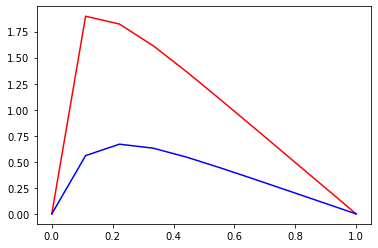

In [2]:
"""
Code to task b in project 1
"""

import numpy as np
import matplotlib.pyplot as plt

n = 10
A = np.zeros((n,n))
a = []
b = []
c = []
h = 1.0/(n-1)
def f(x): 
    return 100*np.exp(-10*x)
f_ny = np.zeros(n)
def exact(x): 
    return 1-(1-np.exp(-10))*x-np.exp(-10*x)
#Making matrix and a-, b-, and c-vector. 
for i in range(n): 
    A[i,i] = 2
    b.append(A[i,i])
    f_ny[i] = 1*h**2*f(i*h)
for i in range(n-1): 
    A[i+1, i] = -1
    A[i, i+1] = -1
    a.append(A[i+1, i])
    c.append(A[i, i+1])
# Forward substitution    
for i in range(n-2): 
    b[i+1] = b[i+1]-(a[i+1]*c[i]/b[i])
    f_ny[i+1] = f_ny[i+1] -(a[i+1]*f_ny[i]/b[i])
x_range = np.zeros(n)
for i in range(n): 
    x_range[i] = i*h
    
u = np.zeros(n)
u[n-1] = f_ny[n-1]/b[n-1]
# Backward substitution
for i in range(n-2): 
    u[n-i-2] = (f_ny[n-i-2]-c[n-i-2]*u[n-i-1])/b[n-i-2]
    
plt.plot(x_range, u, 'r')
plt.plot(x_range, exact(x_range), 'b')
#plt.plot(x_range, abs(u-exact(x_range)))
plt.show()

### Project 1 b) 



In [11]:
"""
Task c in project 1
"""

import numpy as np
import matplotlib.pyplot as plt

n = 1000
A = np.zeros((n,n))
a = []
b = []
c = []
h = 1.0/(n-1)
def f(x): 
    return 100*np.exp(-10*x)
f_ny = np.zeros(n)
def exact(x): 
    return 1-(1-np.exp(-10))*x-np.exp(-10*x)
#Making matrix and a-, b-, and c-vector. 
for i in range(n): 
    A[i,i] = 2
    b.append(A[i,i])
    f_ny[i] = 1*h**2*f(i*h)
for i in range(n-1): 
    A[i+1, i] = -1
    A[i, i+1] = -1
    a.append(A[i+1, i])
    c.append(A[i, i+1])
# Forward substitution    
for i in range(n-2): 
    #b[i+1] = b[i+1]-(a[i+1]*c[i]/b[i])
    #f_ny[i+1] = f_ny[i+1] -(a[i+1]*f_ny[i]/b[i])
    b[i+1] = b[i+1]-(1/b[i])
    f_ny[i+1] = f_ny[i+1]+(f_ny[i]/b[i])
x_range = np.zeros(n)
for i in range(n): 
    x_range[i] = i*h
    
u = np.zeros(n)
u[n-1] = f_ny[n-1]/b[n-1]
# Backward substitution
for i in range(n-2): 
    #u[n-i-2] = (f_ny[n-i-2]-c[n-i-2]*u[n-i-1])/b[n-i-2]
    u[n-i-2] = f_ny[n-i-2]+ (u[n-i-1])/b[n-i-2]
#plt.plot(x_range, u)
#plt.plot(x_range, exact(x_range), 'r')
#plt.show()
"""
d relative error
"""

def rel_err(a, b): 
    return np.log10(abs((a-b)/a)

rele = np.zeros(n)

for i in range(n): 
    rel_e[i] = rel_err(exact(x_range[i]), u[i])
plt.plot(x_range, rel_e)
plt.show()

SyntaxError: invalid syntax (<ipython-input-11-34e5b52fe821>, line 55)